In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.datasets

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']
print(np.shape(X), np.shape(Y))


(1797, 8, 8) (1797,)


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)

In [5]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 10, kernel_size=2, stride=1),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(10,5,kernel_size=2),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(5,10,kernel_size=2),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(10,1,kernel_size=2, stride=1),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [6]:
num_epochs = 200
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)

In [7]:
x_new = torch.autograd.Variable(torch.Tensor(x_train).float())
targets_new = torch.autograd.Variable(torch.Tensor(x_train).long())

x_new = x_new.unsqueeze(1)

#X_new = np.expand_dims(x_train, 1) # necesario para que las dimensiones sean [batch, channel, width]
feature_maps = torch.autograd.Variable(torch.Tensor(x_new).float())
print(feature_maps.size())



n = torch.nn.Conv2d(1,10, 2, stride=1) # in-channels = 1, out-channels = 4, kernel=4
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.ReLU(True)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.Conv2d(10, 5, 2)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.ConvTranspose2d(5, 10, 2)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.ReLU(True)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.ConvTranspose2d(10, 1, 2)
feature_maps = n(feature_maps)
print(feature_maps.size())

n = torch.nn.ReLU(True)
feature_maps = n(feature_maps)
print(feature_maps.size())




torch.Size([898, 1, 8, 8])
torch.Size([898, 10, 7, 7])
torch.Size([898, 10, 7, 7])
torch.Size([898, 5, 6, 6])
torch.Size([898, 10, 7, 7])
torch.Size([898, 10, 7, 7])
torch.Size([898, 1, 8, 8])
torch.Size([898, 1, 8, 8])


In [8]:
x_train = torch.autograd.Variable(torch.Tensor(x_train).float())
targets = torch.autograd.Variable(torch.Tensor(x_train).long())

x_train = x_train.unsqueeze(1)

In [9]:
loss_values = np.zeros(num_epochs)

for epoch in range(num_epochs):
    output = model(x_train)
    loss = distance(output, x_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_values[epoch] = loss.item()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

epoch [1/200], loss:59.8389
epoch [2/200], loss:59.1352
epoch [3/200], loss:57.4899
epoch [4/200], loss:52.2704
epoch [5/200], loss:44.1445
epoch [6/200], loss:34.5035
epoch [7/200], loss:25.6869
epoch [8/200], loss:22.1579
epoch [9/200], loss:26.7705
epoch [10/200], loss:27.2217
epoch [11/200], loss:22.8583
epoch [12/200], loss:18.9587
epoch [13/200], loss:17.5149
epoch [14/200], loss:17.7015
epoch [15/200], loss:18.0470
epoch [16/200], loss:17.6903
epoch [17/200], loss:16.5039
epoch [18/200], loss:14.9222
epoch [19/200], loss:13.7278
epoch [20/200], loss:13.3916
epoch [21/200], loss:13.3330
epoch [22/200], loss:12.5647
epoch [23/200], loss:11.1640
epoch [24/200], loss:9.8901
epoch [25/200], loss:9.0505
epoch [26/200], loss:8.3766
epoch [27/200], loss:7.6258
epoch [28/200], loss:6.9727
epoch [29/200], loss:6.7224
epoch [30/200], loss:6.6890
epoch [31/200], loss:6.4604
epoch [32/200], loss:5.9775
epoch [33/200], loss:5.4296
epoch [34/200], loss:4.9150
epoch [35/200], loss:4.4165
epoch 

Text(0, 0.5, 'loss')

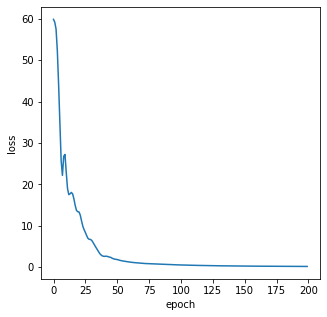

In [10]:
plt.figure(figsize = (5,5))
plt.plot(np.arange(num_epochs), loss_values)
plt.xlabel('epoch')
plt.ylabel('loss')

In [11]:
x_transform = model(x_train)
latent_space = model.encoder(x_train)

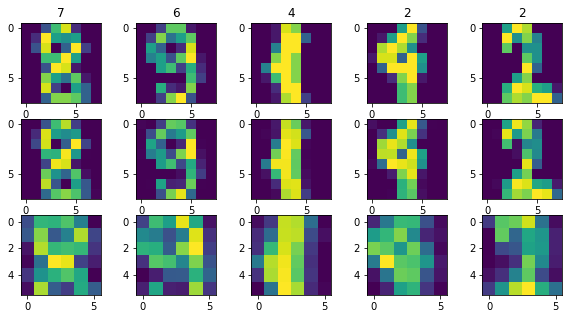

In [12]:
plt.figure(figsize=(10, 5))

offset = 16

for i in range(5):
    l1_plot = plt.subplot(3, 5, i + 1)
    plt.imshow(x_train[i+offset][0].detach().numpy())
    plt.title(str(y_train[i]))
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(3,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(3,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())